## Carga de datos

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.43GB/s]


In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [6]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [7]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [8]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

<Axes: >

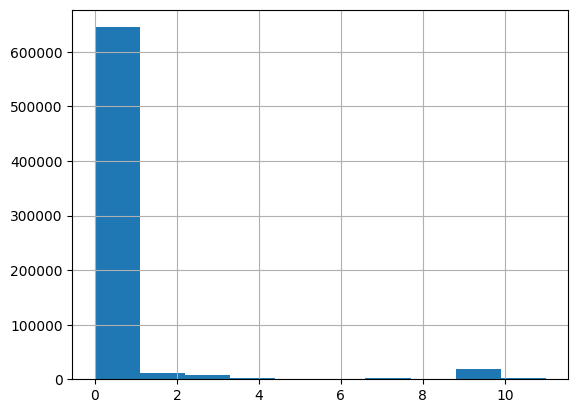

In [9]:
z.isna().sum(axis=1).hist()

In [10]:
##Cuantas muestras tienen mas de 6 valores nulos para eliminarlos directamente.
z.loc[z.isna().sum(axis=1) >= 7].shape

(24133, 21)

In [11]:
z.dropna(thresh=15, inplace=True)

In [12]:
z.reset_index(drop=True, inplace=True)

In [13]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668367 entries, 0 to 668366
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           668367 non-null  int64  
 1   PERIODO_ACADEMICO            668367 non-null  int64  
 2   E_PRGM_ACADEMICO             668367 non-null  object 
 3   E_PRGM_DEPARTAMENTO          668367 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  663776 non-null  object 
 5   E_HORASSEMANATRABAJA         661385 non-null  object 
 6   F_ESTRATOVIVIENDA            660295 non-null  object 
 7   F_TIENEINTERNET              665855 non-null  object 
 8   F_EDUCACIONPADRE             666261 non-null  object 
 9   F_TIENELAVADORA              652726 non-null  object 
 10  F_TIENEAUTOMOVIL             648860 non-null  object 
 11  E_PRIVADO_LIBERTAD           668367 non-null  object 
 12  E_PAGOMATRICULAPROPIO        663573 non-null  object 
 13 

In [14]:
z.E_VALORMATRICULAUNIVERSIDAD.fillna("Sin información", inplace=True)

/tmp/ipython-input-2793222100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z.E_VALORMATRICULAUNIVERSIDAD.fillna("Sin información", inplace=True)


In [15]:
z.E_HORASSEMANATRABAJA.fillna("Sin información", inplace=True)

/tmp/ipython-input-3726863411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z.E_HORASSEMANATRABAJA.fillna("Sin información", inplace=True)


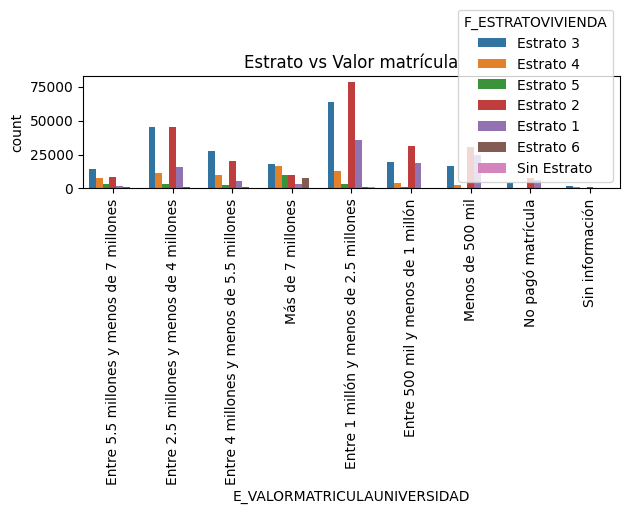

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=z, x='E_VALORMATRICULAUNIVERSIDAD', hue='F_ESTRATOVIVIENDA')
plt.title('Estrato vs Valor matrícula')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [17]:
z['F_ESTRATOVIVIENDA'] = z.groupby('E_VALORMATRICULAUNIVERSIDAD')['F_ESTRATOVIVIENDA']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Sin_dato'))


In [18]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668367 entries, 0 to 668366
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           668367 non-null  int64  
 1   PERIODO_ACADEMICO            668367 non-null  int64  
 2   E_PRGM_ACADEMICO             668367 non-null  object 
 3   E_PRGM_DEPARTAMENTO          668367 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  668367 non-null  object 
 5   E_HORASSEMANATRABAJA         668367 non-null  object 
 6   F_ESTRATOVIVIENDA            668367 non-null  object 
 7   F_TIENEINTERNET              665855 non-null  object 
 8   F_EDUCACIONPADRE             666261 non-null  object 
 9   F_TIENELAVADORA              652726 non-null  object 
 10  F_TIENEAUTOMOVIL             648860 non-null  object 
 11  E_PRIVADO_LIBERTAD           668367 non-null  object 
 12  E_PAGOMATRICULAPROPIO        663573 non-null  object 
 13 

In [19]:
z.F_TIENEINTERNET.fillna("Sin_dato", inplace=True)

/tmp/ipython-input-2824671458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z.F_TIENEINTERNET.fillna("Sin_dato", inplace=True)


In [20]:
z.F_EDUCACIONPADRE.fillna("No sabe", inplace=True)

/tmp/ipython-input-3286912001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z.F_EDUCACIONPADRE.fillna("No sabe", inplace=True)


In [21]:
z.F_EDUCACIONMADRE.value_counts()

,count
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141241
Primaria incompleta,99067
Técnica o tecnológica completa,89249
Educación profesional completa,85021
Secundaria (Bachillerato) incompleta,80763
Primaria completa,55933
Postgrado,46087
Técnica o tecnológica incompleta,27424
Educación profesional incompleta,22383


In [22]:
z.F_EDUCACIONMADRE.fillna("No sabe", inplace=True)

/tmp/ipython-input-568216453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z.F_EDUCACIONMADRE.fillna("No sabe", inplace=True)


In [23]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668367 entries, 0 to 668366
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           668367 non-null  int64  
 1   PERIODO_ACADEMICO            668367 non-null  int64  
 2   E_PRGM_ACADEMICO             668367 non-null  object 
 3   E_PRGM_DEPARTAMENTO          668367 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  668367 non-null  object 
 5   E_HORASSEMANATRABAJA         668367 non-null  object 
 6   F_ESTRATOVIVIENDA            668367 non-null  object 
 7   F_TIENEINTERNET              668367 non-null  object 
 8   F_EDUCACIONPADRE             668367 non-null  object 
 9   F_TIENELAVADORA              652726 non-null  object 
 10  F_TIENEAUTOMOVIL             648860 non-null  object 
 11  E_PRIVADO_LIBERTAD           668367 non-null  object 
 12  E_PAGOMATRICULAPROPIO        663573 non-null  object 
 13 

In [24]:
z['F_TIENELAVADORA'] = z.groupby(['E_VALORMATRICULAUNIVERSIDAD', 'F_ESTRATOVIVIENDA'])['F_TIENELAVADORA']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Sin_dato'))


In [25]:
z['F_TIENEAUTOMOVIL'] = z.groupby(['E_VALORMATRICULAUNIVERSIDAD', 'F_ESTRATOVIVIENDA'])['F_TIENEAUTOMOVIL']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Sin_dato'))

<Axes: >

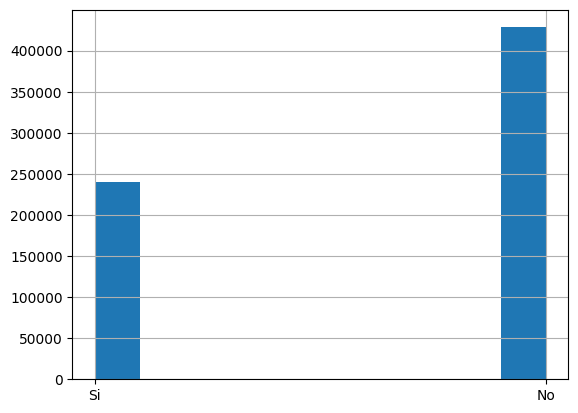

In [26]:
z.F_TIENEAUTOMOVIL.hist()

In [27]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668367 entries, 0 to 668366
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           668367 non-null  int64  
 1   PERIODO_ACADEMICO            668367 non-null  int64  
 2   E_PRGM_ACADEMICO             668367 non-null  object 
 3   E_PRGM_DEPARTAMENTO          668367 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  668367 non-null  object 
 5   E_HORASSEMANATRABAJA         668367 non-null  object 
 6   F_ESTRATOVIVIENDA            668367 non-null  object 
 7   F_TIENEINTERNET              668367 non-null  object 
 8   F_EDUCACIONPADRE             668367 non-null  object 
 9   F_TIENELAVADORA              668367 non-null  object 
 10  F_TIENEAUTOMOVIL             668367 non-null  object 
 11  E_PRIVADO_LIBERTAD           668367 non-null  object 
 12  E_PAGOMATRICULAPROPIO        663573 non-null  object 
 13 

In [28]:
#Solo hay 3 columnas con valores faltantes, vamos a eliminar aquellas filas con 2 o 3 null

z.dropna(thresh=20, inplace=True)

In [29]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666636 entries, 0 to 668366
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           666636 non-null  int64  
 1   PERIODO_ACADEMICO            666636 non-null  int64  
 2   E_PRGM_ACADEMICO             666636 non-null  object 
 3   E_PRGM_DEPARTAMENTO          666636 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  666636 non-null  object 
 5   E_HORASSEMANATRABAJA         666636 non-null  object 
 6   F_ESTRATOVIVIENDA            666636 non-null  object 
 7   F_TIENEINTERNET              666636 non-null  object 
 8   F_EDUCACIONPADRE             666636 non-null  object 
 9   F_TIENELAVADORA              666636 non-null  object 
 10  F_TIENEAUTOMOVIL             666636 non-null  object 
 11  E_PRIVADO_LIBERTAD           666636 non-null  object 
 12  E_PAGOMATRICULAPROPIO        661889 non-null  object 
 13  F_TI

In [30]:
z['E_PAGOMATRICULAPROPIO'] = z.groupby(['E_HORASSEMANATRABAJA', 'E_VALORMATRICULAUNIVERSIDAD'])['E_PAGOMATRICULAPROPIO']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Sin_dato'))

z['F_TIENEINTERNET.1'] = z.groupby(['E_VALORMATRICULAUNIVERSIDAD', 'F_ESTRATOVIVIENDA'])['F_TIENEINTERNET.1']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Sin_dato'))

z['F_TIENECOMPUTADOR'] = z.groupby(['E_VALORMATRICULAUNIVERSIDAD', 'F_ESTRATOVIVIENDA'])['F_TIENECOMPUTADOR']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Sin_dato'))


In [31]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666636 entries, 0 to 668366
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           666636 non-null  int64  
 1   PERIODO_ACADEMICO            666636 non-null  int64  
 2   E_PRGM_ACADEMICO             666636 non-null  object 
 3   E_PRGM_DEPARTAMENTO          666636 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  666636 non-null  object 
 5   E_HORASSEMANATRABAJA         666636 non-null  object 
 6   F_ESTRATOVIVIENDA            666636 non-null  object 
 7   F_TIENEINTERNET              666636 non-null  object 
 8   F_EDUCACIONPADRE             666636 non-null  object 
 9   F_TIENELAVADORA              666636 non-null  object 
 10  F_TIENEAUTOMOVIL             666636 non-null  object 
 11  E_PRIVADO_LIBERTAD           666636 non-null  object 
 12  E_PAGOMATRICULAPROPIO        666636 non-null  object 
 13  F_TI

In [32]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [33]:
z = z.drop(["ID","PERIODO_ACADEMICO"], axis=1)

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668362,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
668363,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
668364,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
668365,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


## Ordinal encoding

In [39]:
rangos_pago = z["E_VALORMATRICULAUNIVERSIDAD"].unique().tolist()
rangos_pago

['Entre 5.5 millones y menos de 7 millones',
 'Entre 2.5 millones y menos de 4 millones',
 'Entre 4 millones y menos de 5.5 millones',
 'Más de 7 millones',
 'Entre 1 millón y menos de 2.5 millones',
 'Entre 500 mil y menos de 1 millón',
 'Menos de 500 mil',
 'No pagó matrícula',
 'Sin información']

In [41]:
dic_pago = {rangos_pago[i]: len(rangos_pago)-i for i in range(len(rangos_pago))}
dic_pago

{'Entre 5.5 millones y menos de 7 millones': 9,
 'Entre 2.5 millones y menos de 4 millones': 8,
 'Entre 4 millones y menos de 5.5 millones': 7,
 'Más de 7 millones': 6,
 'Entre 1 millón y menos de 2.5 millones': 5,
 'Entre 500 mil y menos de 1 millón': 4,
 'Menos de 500 mil': 3,
 'No pagó matrícula': 2,
 'Sin información': 1}

In [46]:
z["CATEGORIA_VALOR_MATRICULA"] = z["E_VALORMATRICULAUNIVERSIDAD"].map(dic_pago)
z

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,9
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,8
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,8
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,7
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668362,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311,4
668363,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260,8
668364,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287,5
668365,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328,8


In [47]:
z.drop("E_VALORMATRICULAUNIVERSIDAD",axis=1,inplace=True)

In [55]:
list_horas = z["E_HORASSEMANATRABAJA"].unique().tolist()
dict_horas = {
  'Menos de 10 horas':2,
 '0':1,
 'Más de 30 horas':5,
 'Entre 21 y 30 horas':4,
 'Entre 11 y 20 horas':3,
 'Sin información':0
}
z["CATEGORIA_HORAS_TRABAJO"] = z["E_HORASSEMANATRABAJA"].map(dict_horas)
z.drop("E_HORASSEMANATRABAJA",axis=1,inplace=True)
z

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO
0,ENFERMERIA,BOGOTÁ,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,9,2
1,DERECHO,ATLANTICO,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,8,1
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,8,5
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,7,1
4,PSICOLOGIA,ANTIOQUIA,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668362,BIOLOGIA,LA GUAJIRA,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311,4,3
668363,PSICOLOGIA,NORTE SANTANDER,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260,8,5
668364,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287,5,2
668365,PSICOLOGIA,TOLIMA,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328,8,2


In [58]:
z["F_ESTRATOVIVIENDA"].unique().tolist()
dic_estrato = {
    'Estrato 3':3,
 'Estrato 4':4,
 'Estrato 5':5,
 'Estrato 2':2,
 'Estrato 1':1,
 'Estrato 6':6,
 'Sin Estrato':0
}
z["CATEGORIA_ESTRATO"] = z["F_ESTRATOVIVIENDA"].map(dic_estrato)
z.drop("F_ESTRATOVIVIENDA",axis=1,inplace=True)
z

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO,CATEGORIA_ESTRATO
0,ENFERMERIA,BOGOTÁ,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,9,2,3
1,DERECHO,ATLANTICO,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,8,1,3
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,8,5,3
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,7,1,4
4,PSICOLOGIA,ANTIOQUIA,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668362,BIOLOGIA,LA GUAJIRA,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311,4,3,2
668363,PSICOLOGIA,NORTE SANTANDER,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260,8,5,3
668364,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287,5,2,3
668365,PSICOLOGIA,TOLIMA,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328,8,2,1


In [61]:
z["F_EDUCACIONPADRE"].unique()
dict_padre = {
    'Técnica o tecnológica incompleta':7,
       'Técnica o tecnológica completa':8,
       'Secundaria (Bachillerato) completa':6,
       'No sabe':1,
       'Primaria completa':4,
       'Educación profesional completa':10,
       'Educación profesional incompleta':9,
        'Primaria incompleta':3,
       'Postgrado':11,
       'Secundaria (Bachillerato) incompleta':5,
       'Ninguno':2,
       'No Aplica':0
}
z["CATEGORIA_EDUCACION_PADRE"] = z["F_EDUCACIONPADRE"].map(dict_padre)
z.drop("F_EDUCACIONPADRE",axis=1,inplace=True)
z

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO,CATEGORIA_ESTRATO,CATEGORIA_EDUCACION_PADRE
0,ENFERMERIA,BOGOTÁ,Si,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,9,2,3,7
1,DERECHO,ATLANTICO,No,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,8,1,3,8
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Si,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,8,5,3,6
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Si,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,7,1,4,1
4,PSICOLOGIA,ANTIOQUIA,Si,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,8,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668362,BIOLOGIA,LA GUAJIRA,Si,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311,4,3,2,6
668363,PSICOLOGIA,NORTE SANTANDER,Si,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260,8,5,3,3
668364,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287,5,2,3,6
668365,PSICOLOGIA,TOLIMA,No,No,No,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328,8,2,1,4


In [ ]:
z["CATEGORIA_EDUCACION_MADRE"] = z["F_EDUCACIONMADRE"].map(dict_padre)
z.drop("F_EDUCACIONMADRE",axis=1,inplace=True)

In [72]:
z

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO,CATEGORIA_ESTRATO,CATEGORIA_EDUCACION_PADRE,CATEGORIA_EDUCACION_MADRE
0,ENFERMERIA,BOGOTÁ,Si,Si,Si,N,No,Si,Si,medio-alto,0.322,0.208,0.310,0.267,9,2,3,7,11
1,DERECHO,ATLANTICO,No,Si,No,N,No,Si,No,bajo,0.311,0.215,0.292,0.264,8,1,3,8,7
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Si,Si,No,N,No,No,Si,bajo,0.297,0.214,0.305,0.264,8,5,3,6,6
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Si,Si,No,N,No,Si,Si,alto,0.485,0.172,0.252,0.190,7,1,4,1,6
4,PSICOLOGIA,ANTIOQUIA,Si,Si,Si,N,No,Si,Si,medio-bajo,0.316,0.232,0.285,0.294,8,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666631,BIOLOGIA,LA GUAJIRA,Si,Si,No,N,Si,Si,Si,medio-alto,0.237,0.271,0.271,0.311,4,3,2,6,5
666632,PSICOLOGIA,NORTE SANTANDER,Si,Si,No,N,No,Si,Si,bajo,0.314,0.240,0.278,0.260,8,5,3,3,5
666633,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,No,N,Si,Si,Si,medio-bajo,0.286,0.240,0.314,0.287,5,2,3,6,5
666634,PSICOLOGIA,TOLIMA,No,No,No,N,Si,Si,No,bajo,0.132,0.426,0.261,0.328,8,2,1,4,4


In [74]:
z["CATEGORIA_INTERNET"] = z["F_TIENEINTERNET"].map({"Si":1, "No":0})
z["CATEGORIA_LAVADORA"] = z["F_TIENELAVADORA"].map({"Si":1, "No":0})
z["CATEGORIA_AUTO"] = z["F_TIENEAUTOMOVIL"].map({"Si":1, "No":0})
z["CATEGORIA_LIBERTAD"] = z["E_PRIVADO_LIBERTAD"].map({"S":1, "N":0})
z["CATEGORIA_PAGOMATRICULAPROPIO"] = z["E_PAGOMATRICULAPROPIO"].map({"Si":1, "No":0})
z["CATEGORIA_COMPUTADOR"] = z["F_TIENECOMPUTADOR"].map({"Si":1, "No":0})
z["CATEGORIA_INTERNET.1"] = z["F_TIENEINTERNET.1"].map({"Si":1, "No":0})


In [76]:
z.drop(
    ["F_TIENEINTERNET",
     "F_TIENELAVADORA",
     "F_TIENEAUTOMOVIL",
     "E_PRIVADO_LIBERTAD",
     "E_PAGOMATRICULAPROPIO",
     "F_TIENECOMPUTADOR",
     "F_TIENEINTERNET.1"],
    axis=1,inplace=True)
z

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO,CATEGORIA_ESTRATO,CATEGORIA_EDUCACION_PADRE,CATEGORIA_EDUCACION_MADRE,CATEGORIA_INTERNET,CATEGORIA_LAVADORA,CATEGORIA_AUTO,CATEGORIA_LIBERTAD,CATEGORIA_PAGOMATRICULAPROPIO,CATEGORIA_COMPUTADOR,CATEGORIA_INTERNET.1
0,ENFERMERIA,BOGOTÁ,medio-alto,0.322,0.208,0.310,0.267,9,2,3,7,11,1.0,1,1,0,0.0,1,1
1,DERECHO,ATLANTICO,bajo,0.311,0.215,0.292,0.264,8,1,3,8,7,0.0,1,0,0,0.0,1,0
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,bajo,0.297,0.214,0.305,0.264,8,5,3,6,6,1.0,1,0,0,0.0,0,1
3,ADMINISTRACION DE EMPRESAS,SANTANDER,alto,0.485,0.172,0.252,0.190,7,1,4,1,6,1.0,1,0,0,0.0,1,1
4,PSICOLOGIA,ANTIOQUIA,medio-bajo,0.316,0.232,0.285,0.294,8,4,3,4,4,1.0,1,1,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666631,BIOLOGIA,LA GUAJIRA,medio-alto,0.237,0.271,0.271,0.311,4,3,2,6,5,1.0,1,0,0,1.0,1,1
666632,PSICOLOGIA,NORTE SANTANDER,bajo,0.314,0.240,0.278,0.260,8,5,3,3,5,1.0,1,0,0,0.0,1,1
666633,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,medio-bajo,0.286,0.240,0.314,0.287,5,2,3,6,5,1.0,1,0,0,1.0,1,1
666634,PSICOLOGIA,TOLIMA,bajo,0.132,0.426,0.261,0.328,8,2,1,4,4,0.0,0,0,0,1.0,1,0


In [77]:
z = pd.get_dummies(z,columns=["E_PRGM_ACADEMICO","E_PRGM_DEPARTAMENTO"])
z

,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO,CATEGORIA_ESTRATO,CATEGORIA_EDUCACION_PADRE,CATEGORIA_EDUCACION_MADRE,...,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,medio-alto,0.322,0.208,0.310,0.267,9,2,3,7,11,...,False,False,False,False,False,False,False,False,False,False
1,bajo,0.311,0.215,0.292,0.264,8,1,3,8,7,...,False,False,False,False,False,False,False,False,False,False
2,bajo,0.297,0.214,0.305,0.264,8,5,3,6,6,...,False,False,False,False,False,False,False,False,False,False
3,alto,0.485,0.172,0.252,0.190,7,1,4,1,6,...,False,False,False,False,False,True,False,False,False,False
4,medio-bajo,0.316,0.232,0.285,0.294,8,4,3,4,4,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666631,medio-alto,0.237,0.271,0.271,0.311,4,3,2,6,5,...,False,False,False,False,False,False,False,False,False,False
666632,bajo,0.314,0.240,0.278,0.260,8,5,3,3,5,...,True,False,False,False,False,False,False,False,False,False
666633,medio-bajo,0.286,0.240,0.314,0.287,5,2,3,6,5,...,False,False,False,False,False,False,False,False,False,False
666634,bajo,0.132,0.426,0.261,0.328,8,2,1,4,4,...,False,False,False,False,False,False,False,True,False,False


In [79]:
z["RENDIMIENTO_GLOBAL"].unique()
dict_rendimiento = {
    'medio-alto':3,
    'bajo':1,
    'alto':4,
    'medio-bajo':2
}
z["RENDIMIENTO"] = z["RENDIMIENTO_GLOBAL"].map(dict_rendimiento)
z.drop("RENDIMIENTO_GLOBAL",axis=1,inplace=True)
z

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,CATEGORIA_VALOR_MATRICULA,CATEGORIA_HORAS_TRABAJO,CATEGORIA_ESTRATO,CATEGORIA_EDUCACION_PADRE,CATEGORIA_EDUCACION_MADRE,CATEGORIA_INTERNET,...,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES,RENDIMIENTO
0,0.322,0.208,0.310,0.267,9,2,3,7,11,1.0,...,False,False,False,False,False,False,False,False,False,3
1,0.311,0.215,0.292,0.264,8,1,3,8,7,0.0,...,False,False,False,False,False,False,False,False,False,1
2,0.297,0.214,0.305,0.264,8,5,3,6,6,1.0,...,False,False,False,False,False,False,False,False,False,1
3,0.485,0.172,0.252,0.190,7,1,4,1,6,1.0,...,False,False,False,False,True,False,False,False,False,4
4,0.316,0.232,0.285,0.294,8,4,3,4,4,1.0,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666631,0.237,0.271,0.271,0.311,4,3,2,6,5,1.0,...,False,False,False,False,False,False,False,False,False,3
666632,0.314,0.240,0.278,0.260,8,5,3,3,5,1.0,...,False,False,False,False,False,False,False,False,False,1
666633,0.286,0.240,0.314,0.287,5,2,3,6,5,1.0,...,False,False,False,False,False,False,False,False,False,2
666634,0.132,0.426,0.261,0.328,8,2,1,4,4,0.0,...,False,False,False,False,False,False,True,False,False,1
